# Preprocessing

TODO: train test split, pad audio cqt matrix to have 128 lines,  
split audio into chunks of 0.1s, make number of columns of training
examples and training labels match

## training examples (audio)
- load audio
- put them into arrays
- perform cqt transform
- slice audio into sequences of same size for training

# training labels (csv)
- load note data
- convert to seconds
- convert into indicator vector (size 128, 1 if note present 0 if not) for each time window (same as defined for audio sequnces)

In [2]:
import os
import librosa
import pandas as pd
import numpy as np

train_audio_dir = 'datasets/musicnet/musicnet/train_data'
train_labels_dir = 'datasets/musicnet/musicnet/train_labels'

train_audio_data = {}
train_labels_data = {}

LIMIT = 10
count = 0
for filename in os.listdir(train_audio_dir):
    if count >= LIMIT:
        break
    else:
        filepath = os.path.join(train_audio_dir, filename)
        audio_data, sr = librosa.load(filepath, sr=None)
        train_audio_data[filename] = {'audio': audio_data, 'sample_rate': sr}
        count +=1

count = 0
for filename in os.listdir(train_labels_dir):
    if count >= LIMIT:
        break
    else:
        filepath = os.path.join(train_labels_dir, filename)
        train_labels_data[filename] = pd.read_csv(filepath)
        count+=1

In [3]:
print(train_audio_data)
print(train_labels_data)

{'1727.wav': {'audio': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'sample_rate': 44100}, '1728.wav': {'audio': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'sample_rate': 44100}, '1729.wav': {'audio': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'sample_rate': 44100}, '1730.wav': {'audio': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'sample_rate': 44100}, '1733.wav': {'audio': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'sample_rate': 44100}, '1734.wav': {'audio': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'sample_rate': 44100}, '1735.wav': {'audio': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'sample_rate': 44100}, '1739.wav': {'audio': array([ 0.0000000e+00, -3.0517578e-05,  0.0000000e+00, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32), 'sample_rate': 44100}, '1742.wav': {'audio': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'sample_rate': 44100}, '1749.wav': {'audio': array([0., 0., 0

In [4]:
train_audio_array = []
train_label_array = []

for filename, data in train_audio_data.items():
    audio_array = data['audio']
    train_audio_array.append(audio_array)

for filename, data in train_labels_data.items():
        label_array = data.values
        train_label_array.append(label_array)


print(train_audio_array)
print(train_label_array)

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([ 0.0000000e+00, -3.0517578e-05,  0.0000000e+00, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]
[array([[9182, 90078, 43, ..., 4.0, 1.5, 'Dotted Quarter'],
       [9182, 33758, 42, ..., 4.0, 0.5, 'Eighth'],
       [9182, 62430, 1, ..., 4.0, 1.0, 'Quarter'],
       ...,
       [19226590, 19233758, 1, ..., 365.375, 0.125, 'Thirty Second'],
       [19233758, 19421150, 1, ..., 365.5, 2.5, 'Dotted Half'],
       [19233758, 19421150, 1, ..., 365.5, 2.5, 'Dotted Half']],
      dtype=objec

In [97]:
import librosa
# midi standard goes from C0 to F#10 for 128 pitch total
C0_freq = 16.35	

# Define your parameters
sr = 44100 # Sampling rate
TIMESTEP = 0.10 # Desired TIMESTEP in seconds

# Calculate the number of samples for the desired TIMESTEP
hop_length = int(sr * TIMESTEP)
print(sr, hop_length)

# compute CQT for every audio sample
train_cqt_array = [librosa.cqt(audio, fmin=C0_freq, n_bins=108, sr=sr, hop_length=hop_length) for audio in train_audio_array] 

44100 4410


In [ ]:
# CQT can't comput above 108 frequency bins so will add lines of 0s manually
# it corresponds to high freq notes anyway and probably won't impact result
# that much
for i in range(len(train_cqt_array)):
    # Create 20 rows of zeros with the same width as the original array
    zeros = np.zeros((20, train_cqt_array[i].shape[1]))
    # Vertically stack the original array and zeros
    train_cqt_array[i] = np.vstack((train_cqt_array[i], zeros)) 

/tmp/ipykernel_30408/2190372343.py:6: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(cqt_array, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='cqt_note')
/tmp/ipykernel_30408/2190372343.py:6: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(librosa.amplitude_to_db(cqt_array, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='cqt_note')


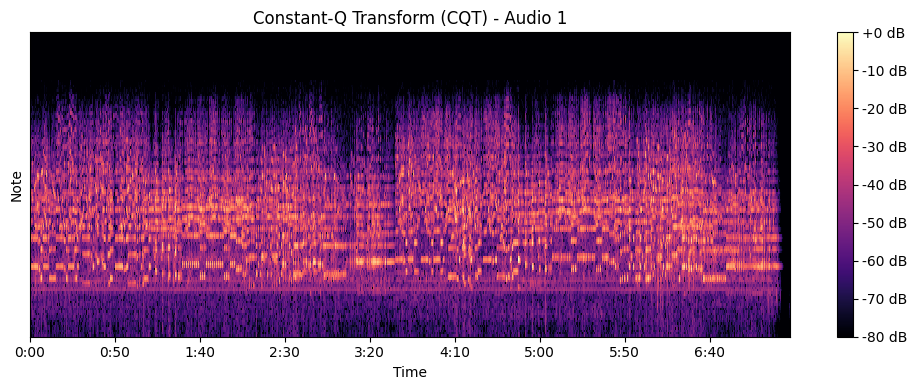

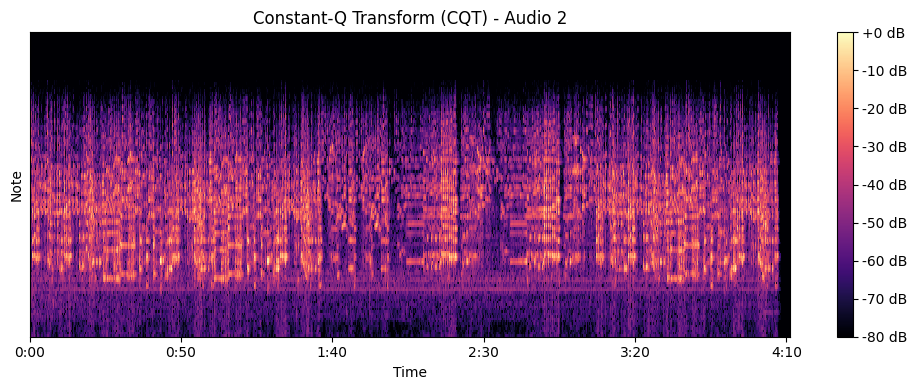

In [98]:
import matplotlib.pyplot as plt

for i in range(2):
    cqt_array = train_cqt_array[i]
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(cqt_array, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='cqt_note')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Constant-Q Transform (CQT) - Audio {}'.format(i+1))
    plt.tight_layout()
    plt.show()

In [99]:
# figure out timestep and cut audios into sequences
print(np.array(train_cqt_array[0]).shape)
print(np.array(train_cqt_array[1]).shape)
print(np.array(train_cqt_array[2]).shape)

print(f'timestep : {TIMESTEP}(s), hop_length : {hop_length}, sampling_rate : {sr}Hz')

(128, 4471)
(128, 2512)
(128, 4445)
timestep : 0.1(s), hop_length : 4410, sampling_rate : 44100Hz


# Processing labels

In [89]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("datasets/musicnet/musicnet/train_labels/1727.csv", delimiter=",")

# Convert times to seconds, i don't know what unit the times are, but i know
# the factor to get seconds by looking at metadata and labels and comparing
# duration of song and end_time of last note
df[['start_time', 'end_time']] /= 43447
# print(df)

# Extract the required columns: start_time, end_time, note
note_list = df[["start_time", "end_time", "note"]].values.tolist()

# Print the first few rows to verify the data
print(note_list[:5])

[[0.18364, 1.80156, 53.0], [0.18364, 0.67516, 65.0], [0.18364, 1.2486, 69.0], [0.18364, 4.04412, 41.0], [0.18364, 1.2486, 81.0]]


In [90]:
def convert_to_matrix(notes, timestep):
    """
    Convert the note event to a matrix representing
    note activation at each timestep. One column represent
    1 time interval and will be filled with 1 or 0 on the line
    which corresponds to a note being active or not.

    notes: list of list containing these [note_start, note_end, note_pitch]
    timestep: in seconds
    """
    import sys
    # Find the total duration of the notes
    total_duration = max(note[1] for note in notes)
    
    # Calculate the number of timesteps(s)
    num_timesteps = int(total_duration / timestep) + 1

    # Create an empty matrix filled with zeros
    n_of_notes = 128 # as per the midi standard
    matrix = [[0] * num_timesteps for _ in range(n_of_notes)]
    
    # Populate the matrix with ones where notes are played
    for note in notes:
        # range where a note is active
        start_idx = int(note[0] / timestep)
        end_idx = int(note[1] / timestep)

        # fill in 1s for all the corresponding timesteps at the line
        # which corresponds to the pitch
        for timestep_idx in range(start_idx, end_idx + 1):
            pitch_idx = int(note[2])
            try:
                matrix[pitch_idx][timestep_idx] = 1
            except Exception as err:
                print(err)
                print(pitch_idx, timestep_idx)
                sys.exit()

    return matrix

mat = convert_to_matrix(note_list, TIMESTEP)

In [91]:
print(np.array(mat).shape)
time_interval = [note_bin[0] for note_bin in mat]
len(time_interval)
print([(i, val) for (i, val) in enumerate(time_interval) if val==1])

(128, 3885)
[]


# Testing is over now for the real loop

In [92]:
import os
import pandas as pd

# Directory containing the CSV files
directory = "datasets/musicnet/musicnet/train_labels/"
out_directory = "datasets/musicnet/musicnet/train_labels_bettered/"

if not os.path.exists(out_directory):
    os.makedirs(out_directory)

# Loop over files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Load the CSV file into a DataFrame
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath, delimiter=",")

        # Convert times to seconds, i don't know what unit the times are, but i know
        # the factor to get seconds by looking at metadata and labels and comparing
        # duration of song and end_time of last note
        df[['start_time', 'end_time']] /= 43447

        # Extract the required columns: start_time, end_time, note
        note_list = df[["start_time", "end_time", "note"]].values.tolist()

        # Print the first few rows to verify the data
        # print(note_list[:5])

        # process the note list to turn into a timestepped matrix
        mat = convert_to_matrix(note_list, TIMESTEP)

        # Save the resulting matrix in a CSV file with the same name
        output_filename = os.path.splitext(filename)[0] + "_processed.csv"
        output_filepath = os.path.join(out_directory, output_filename)
        pd.DataFrame(mat).to_csv(output_filepath, index=False, mode='w')

In [96]:
df = pd.read_csv("datasets/musicnet/musicnet/train_labels_bettered/1727_processed.csv", delimiter=",")
print(df)

matrix_list = df.values.tolist()
time_interval = [note_bin[0] for note_bin in matrix_list]
len(time_interval)
print([(i, val) for (i, val) in enumerate(time_interval) if val==1])

     0  1  2  3  4  5  6  7  8  9  ...  4461  4462  4463  4464  4465  4466  \
0    0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
1    0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
2    0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
3    0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
4    0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
..  .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
123  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
124  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
125  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
126  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
127  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

     4467  4468  4469  4470  
0       0     0     0     0  
1  